# I. Collect the Data

## Use NumPy module to generate over 1500 random latitude and longitude pairs

In [13]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import requests
from datetime import datetime
import time
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add latitude and longitude tuples to list
coordinates = list(lats_lngs)

## Match coordinates to the nearest city using Python's citipy module

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

## Use the OpenWeatherMap API to request the current weather data from each unique city in your list. Parse the JSON data from the API request, and obtain the following data for each city:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

## Then add the data to a pandas DataFrame

In [5]:
# Starting URL for Weather Map API Call. Units = Imperial
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=114bba6fa0eed51bc8e39279807587ea


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. replace method used to take out blank spaces and concatenate city names.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | dunda
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | bandarbeyla
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | deh rawud
City not found. Skipping...
Processing Record 12 of Set 1 | burica
City not found. Skipping...
Processing Record 13 of Set 1 | fairbanks
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tupi paulista
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | sijunjung
Processing Record 21 of Set 1 | hilo
Processing Re

Processing Record 36 of Set 4 | coquimbo
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | la palma
Processing Record 39 of Set 4 | kempsey
Processing Record 40 of Set 4 | yar-sale
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | el calvario
Processing Record 45 of Set 4 | rodrigues alves
Processing Record 46 of Set 4 | jaciara
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | winder
Processing Record 50 of Set 4 | tazovskiy
Processing Record 1 of Set 5 | sao miguel do araguaia
Processing Record 2 of Set 5 | manzil tamim
City not found. Skipping...
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | vallenar
Processing Record 7 of Set 5 | tlayacapan
Processing Record 8 of Set 

Processing Record 24 of Set 8 | oxford
Processing Record 25 of Set 8 | andros town
Processing Record 26 of Set 8 | gurgan
City not found. Skipping...
Processing Record 27 of Set 8 | kavant
City not found. Skipping...
Processing Record 28 of Set 8 | flagstaff
Processing Record 29 of Set 8 | velizh
Processing Record 30 of Set 8 | caluquembe
Processing Record 31 of Set 8 | shuya
Processing Record 32 of Set 8 | vestmannaeyjar
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | sabla
Processing Record 35 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | linjiang
Processing Record 38 of Set 8 | bairiki
Processing Record 39 of Set 8 | north platte
Processing Record 40 of Set 8 | bandar
Processing Record 41 of Set 8 | kuching
Processing Record 42 of Set 8 | tuy hoa
Processing Record 43 of Set 8 | kulhudhuffushi
Processing Record 44 of Set 8 | morondava
Processing Record 45 of Set 8 | mandurah
Processing R

Processing Record 16 of Set 12 | abu dhabi
Processing Record 17 of Set 12 | san miguel
Processing Record 18 of Set 12 | bosaso
Processing Record 19 of Set 12 | noumea
Processing Record 20 of Set 12 | odesa
Processing Record 21 of Set 12 | sorland
Processing Record 22 of Set 12 | ho
City not found. Skipping...
Processing Record 23 of Set 12 | gravelbourg
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | albion
Processing Record 26 of Set 12 | espita
Processing Record 27 of Set 12 | sawtell
Processing Record 28 of Set 12 | assela
City not found. Skipping...
Processing Record 29 of Set 12 | ihosy
Processing Record 30 of Set 12 | muroto
Processing Record 31 of Set 12 | khash
Processing Record 32 of Set 12 | afmadu
City not found. Skipping...
Processing Record 33 of Set 12 | maiduguri
Processing Record 34 of Set 12 | batemans bay
Processing Record 35 of Set 12 | lorengau
Processing Record 36 of Set 12 | coahuayana
Processing Record 37 of Set 12 | pangoa
Processing 

In [7]:
# Check to ensure data from at least 500 cities has been collected.
len(city_data)

556

In [8]:
# Convert city_data to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,80.56,79,88,11.88,EC,2021-07-14 16:19:13
1,Victoria,22.2855,114.1577,88.32,80,14,8.99,HK,2021-07-14 16:17:18
2,Dunda,-8.1167,34.2500,73.20,47,64,8.55,TZ,2021-07-14 16:19:14
3,Clyde River,70.4692,-68.5914,46.63,76,90,11.50,CA,2021-07-14 16:19:14
4,Nikolskoye,59.7035,30.7861,86.81,59,92,1.59,RU,2021-07-14 16:19:15
5,Bandarbeyla,9.4942,50.8122,83.16,61,57,29.48,SO,2021-07-14 16:19:15
6,Guerrero Negro,27.9769,-114.0611,75.13,61,38,6.87,MX,2021-07-14 16:19:16
7,Rikitea,-23.1203,-134.9692,72.93,70,1,8.25,PF,2021-07-14 16:19:16
8,Qaanaaq,77.4840,-69.3632,38.52,98,100,1.61,GL,2021-07-14 16:19:17
9,San Patricio,28.0170,-97.5169,87.69,63,31,6.89,US,2021-07-14 16:19:18


In [9]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-07-14 16:19:13,-0.7393,-90.3518,80.56,79,88,11.88
1,Victoria,HK,2021-07-14 16:17:18,22.2855,114.1577,88.32,80,14,8.99
2,Dunda,TZ,2021-07-14 16:19:14,-8.1167,34.2500,73.20,47,64,8.55
3,Clyde River,CA,2021-07-14 16:19:14,70.4692,-68.5914,46.63,76,90,11.50
4,Nikolskoye,RU,2021-07-14 16:19:15,59.7035,30.7861,86.81,59,92,1.59


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# II. Plot the Data

## Create visualizations that showcase the retrieved weather parameters with changing latitude for the 500-plus cities from all over the world.

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Latitude vs. Maximum Temperature

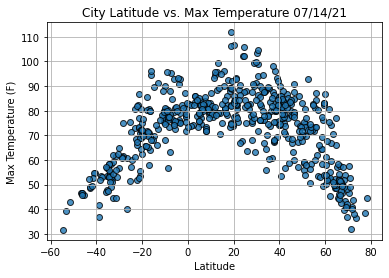

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude vs. Humidity

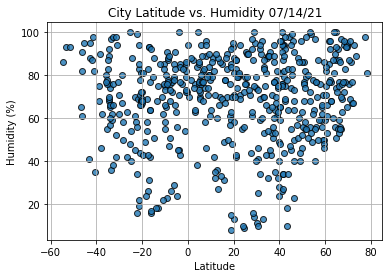

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Latitude vs. Cloudiness

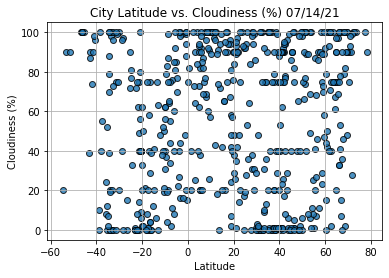

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Latitude vs. Wind Speed

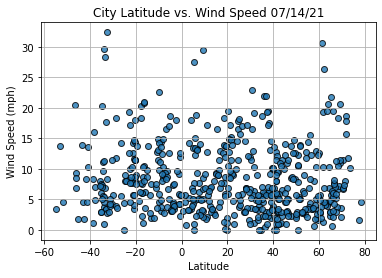

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# III. Determine Correlations

## Use linear regression to find relationships between plotted variables.